# Estimating $a$ from spiral tip trajectories
Tim Tyree<br>
9.5.2023

In [571]:
import sys,os
og_stdout=sys.stdout
from lib.my_initialization import *

In [572]:
os.chdir(nb_dir)
from lib import *

In [573]:
import cupy, cudf
from lib.rapids_func import *

In [574]:
import seaborn as sns
import matplotlib.ticker as mtick
#reset matplotlib settings
import matplotlib as mpl
sns.reset_orig()
mpl.rc_file_defaults()

In [575]:
import warnings
warnings.simplefilter("ignore", UserWarning)
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# define module

In [658]:
1

1

# track tips over time

In [972]:
#select trials with uncached trajectories
ds=5.0
tmax_sec=30
# diffcoef=0.001#*2
diffcoef=0.0005#*2
tau_d=0.54#0.45
dt=0.025
sr=600 #search range in pixels
mem=0  #memoryless tracking is highest quality
# results_folder=f'param_set_8_ds_{ds}_tmax_{tmax_sec}_diffCoef_{diffcoef}_dt_{dt}'
results_folder=f'/home/timothytyree/Documents/GitHub/care/notebooks/Data/initial-conditions-suite-2/param_set_8_ds_{ds}_tmax_{tmax_sec}_diffCoef_{diffcoef}_dt_{dt}_taud_{tau_d}'
assert os.path.exists(results_folder)
log_folder=os.path.join(results_folder,'Log')
traj_folder=os.path.join(results_folder,'trajectories')
input_dir_lst=[]
regener_cache=False
for fn in os.listdir(log_folder):
    fnout=fn.replace('_log.csv',f'_traj_sr_{sr}_mem_{mem}.csv')
    dirout=os.path.join(traj_folder,fnout)
    if regener_cache or not os.path.exists(dirout):
        input_dir_lst.append(os.path.join(log_folder,fn))
# check each file if it ends in .csv before merging it
def is_csv(file_name):
    return file_name[-4:]=='.csv'
input_dir_lst = [f for f in input_dir_lst if is_csv(f)]
len(input_dir_lst)

3

In [973]:
# input_file_name=input_dir_lst[0]
# df=pd.read_csv(input_file_name)
# df.drop(index=df[df['n']==0].index,inplace=True)

# #this is for annihilations! ~50 sec runtime per trial
# df=track_particle_annihilations_pbc_nearest_neighbors_simple(df,width=200,height=200,
#                 max_disp=30, #15-1000 appears to work
#                 max_dist=20, # appears to work
#                 min_num_obs=1,use_final_annihilation=True,printing=False)
results_folder

'/home/timothytyree/Documents/GitHub/care/notebooks/Data/initial-conditions-suite-2/param_set_8_ds_5.0_tmax_30_diffCoef_0.0005_dt_0.025_taud_0.54'

In [974]:
from lib.routines.compute_bdrates import *
def run_routine2(input_file_name):
    results_folder = os.path.dirname(os.path.dirname(input_file_name))
    kwargs = get_kwargs(input_file_name,results_folder=results_folder) #really fast
    #modify any nondefault kwargs here:
#     kwargs['data_dir_bdrates'] = kwargs['data_dir_bdrates'].replace('birth-death-rates/','')
    retval = birth_death_rates_from_log(input_file_name, **kwargs)  #really fast
    output_file_name = generate_track_tips_pbc(input_file_name, save_fn=None,
                                          mem=mem,sr=sr,width=200,height=200) #veeeery low level printing...
    return output_file_name

In [975]:
#CPU spiral tips with GPU time steps
# b = db.from_sequence(input_fn_list, npartitions=1).map(generate_tip_log_from_ic)

#all CPU version
# b = db.from_sequence(input_fn_list, npartitions=7).map(birth_death_rates_from_ic)
# b = db.from_sequence(file_name_list, npartitions=10).map(run_routine2)
b = db.from_sequence(input_dir_lst, npartitions=10).map(run_routine2)

start = time.time()
retval = list(b)
print(f"run time for generating birth-death rates from file_name_list: {time.time()-start:.2f} seconds.")
beep(3)

trackpy.linking.linking.link_iter:  Frame 1: 16 trajectories present.
trackpy.linking.linking.link_iter:  Frame 2: 14 trajectories present.
trackpy.linking.linking.link_iter:  Frame 3: 14 trajectories present.
trackpy.linking.linking.link_iter:  Frame 4: 14 trajectories present.
trackpy.linking.linking.link_iter:  Frame 5: 16 trajectories present.
trackpy.linking.linking.link_iter:  Frame 6: 16 trajectories present.
trackpy.linking.linking.link_iter:  Frame 7: 16 trajectories present.
trackpy.linking.linking.link_iter:  Frame 8: 14 trajectories present.
trackpy.linking.linking.link_iter:  Frame 9: 14 trajectories present.
trackpy.linking.linking.link_iter:  Frame 10: 14 trajectories present.
trackpy.linking.linking.link_iter:  Frame 11: 14 trajectories present.
trackpy.linking.linking.link_iter:  Frame 12: 14 trajectories present.
trackpy.linking.linking.link_iter:  Frame 13: 14 trajectories present.
trackpy.linking.linking.link_iter:  Frame 14: 14 trajectories present.
trackpy.linking

trackpy.linking.linking.link_iter:  Frame 186: 8 trajectories present.
trackpy.linking.linking.link_iter:  Frame 187: 8 trajectories present.
trackpy.linking.linking.link_iter:  Frame 188: 8 trajectories present.
trackpy.linking.linking.link_iter:  Frame 189: 8 trajectories present.
trackpy.linking.linking.link_iter:  Frame 190: 8 trajectories present.
trackpy.linking.linking.link_iter:  Frame 191: 10 trajectories present.
trackpy.linking.linking.link_iter:  Frame 192: 8 trajectories present.
trackpy.linking.linking.link_iter:  Frame 193: 8 trajectories present.
trackpy.linking.linking.link_iter:  Frame 194: 8 trajectories present.
trackpy.linking.linking.link_iter:  Frame 195: 8 trajectories present.
trackpy.linking.linking.link_iter:  Frame 196: 8 trajectories present.
trackpy.linking.linking.link_iter:  Frame 197: 8 trajectories present.
trackpy.linking.linking.link_iter:  Frame 198: 8 trajectories present.
trackpy.linking.linking.link_iter:  Frame 199: 8 trajectories present.
track

trackpy.linking.linking.link_iter:  Frame 382: 4 trajectories present.
trackpy.linking.linking.link_iter:  Frame 383: 2 trajectories present.
trackpy.linking.linking.link_iter:  Frame 384: 2 trajectories present.
trackpy.linking.linking.link_iter:  Frame 385: 2 trajectories present.
trackpy.linking.linking.link_iter:  Frame 386: 2 trajectories present.
trackpy.linking.linking.link_iter:  Frame 387: 2 trajectories present.
trackpy.linking.linking.link_iter:  Frame 1: 14 trajectories present.
trackpy.linking.linking.link_iter:  Frame 2: 14 trajectories present.
trackpy.linking.linking.link_iter:  Frame 3: 16 trajectories present.
trackpy.linking.linking.link_iter:  Frame 4: 14 trajectories present.
trackpy.linking.linking.link_iter:  Frame 5: 14 trajectories present.
trackpy.linking.linking.link_iter:  Frame 6: 14 trajectories present.
trackpy.linking.linking.link_iter:  Frame 7: 14 trajectories present.
trackpy.linking.linking.link_iter:  Frame 8: 14 trajectories present.
trackpy.linkin

trackpy.linking.linking.link_iter:  Frame 182: 8 trajectories present.
trackpy.linking.linking.link_iter:  Frame 183: 8 trajectories present.
trackpy.linking.linking.link_iter:  Frame 184: 6 trajectories present.
trackpy.linking.linking.link_iter:  Frame 185: 6 trajectories present.
trackpy.linking.linking.link_iter:  Frame 186: 6 trajectories present.
trackpy.linking.linking.link_iter:  Frame 187: 6 trajectories present.
trackpy.linking.linking.link_iter:  Frame 188: 6 trajectories present.
trackpy.linking.linking.link_iter:  Frame 189: 6 trajectories present.
trackpy.linking.linking.link_iter:  Frame 190: 6 trajectories present.
trackpy.linking.linking.link_iter:  Frame 191: 6 trajectories present.
trackpy.linking.linking.link_iter:  Frame 192: 8 trajectories present.
trackpy.linking.linking.link_iter:  Frame 193: 8 trajectories present.
trackpy.linking.linking.link_iter:  Frame 194: 8 trajectories present.
trackpy.linking.linking.link_iter:  Frame 195: 8 trajectories present.
trackp

trackpy.linking.linking.link_iter:  Frame 298: 4 trajectories present.
trackpy.linking.linking.link_iter:  Frame 299: 4 trajectories present.
trackpy.linking.linking.link_iter:  Frame 300: 4 trajectories present.
trackpy.linking.linking.link_iter:  Frame 301: 4 trajectories present.
trackpy.linking.linking.link_iter:  Frame 302: 4 trajectories present.
trackpy.linking.linking.link_iter:  Frame 303: 4 trajectories present.
trackpy.linking.linking.link_iter:  Frame 304: 4 trajectories present.
trackpy.linking.linking.link_iter:  Frame 305: 4 trajectories present.
trackpy.linking.linking.link_iter:  Frame 306: 4 trajectories present.
trackpy.linking.linking.link_iter:  Frame 307: 4 trajectories present.
trackpy.linking.linking.link_iter:  Frame 308: 4 trajectories present.
trackpy.linking.linking.link_iter:  Frame 309: 4 trajectories present.
trackpy.linking.linking.link_iter:  Frame 310: 4 trajectories present.
trackpy.linking.linking.link_iter:  Frame 311: 4 trajectories present.
trackp

trackpy.linking.linking.link_iter:  Frame 76: 8 trajectories present.
trackpy.linking.linking.link_iter:  Frame 77: 8 trajectories present.
trackpy.linking.linking.link_iter:  Frame 78: 8 trajectories present.
trackpy.linking.linking.link_iter:  Frame 79: 8 trajectories present.
trackpy.linking.linking.link_iter:  Frame 80: 10 trajectories present.
trackpy.linking.linking.link_iter:  Frame 81: 10 trajectories present.
trackpy.linking.linking.link_iter:  Frame 82: 10 trajectories present.
trackpy.linking.linking.link_iter:  Frame 83: 10 trajectories present.
trackpy.linking.linking.link_iter:  Frame 84: 10 trajectories present.
trackpy.linking.linking.link_iter:  Frame 85: 10 trajectories present.
trackpy.linking.linking.link_iter:  Frame 86: 10 trajectories present.
trackpy.linking.linking.link_iter:  Frame 87: 10 trajectories present.
trackpy.linking.linking.link_iter:  Frame 88: 10 trajectories present.
trackpy.linking.linking.link_iter:  Frame 89: 10 trajectories present.
trackpy.li

trackpy.linking.linking.link_iter:  Frame 213: 8 trajectories present.
trackpy.linking.linking.link_iter:  Frame 214: 8 trajectories present.
trackpy.linking.linking.link_iter:  Frame 215: 8 trajectories present.
trackpy.linking.linking.link_iter:  Frame 216: 8 trajectories present.
trackpy.linking.linking.link_iter:  Frame 217: 8 trajectories present.
trackpy.linking.linking.link_iter:  Frame 218: 8 trajectories present.
trackpy.linking.linking.link_iter:  Frame 219: 8 trajectories present.
trackpy.linking.linking.link_iter:  Frame 220: 8 trajectories present.
trackpy.linking.linking.link_iter:  Frame 221: 8 trajectories present.
trackpy.linking.linking.link_iter:  Frame 222: 8 trajectories present.
trackpy.linking.linking.link_iter:  Frame 223: 8 trajectories present.
trackpy.linking.linking.link_iter:  Frame 224: 8 trajectories present.
trackpy.linking.linking.link_iter:  Frame 225: 8 trajectories present.
trackpy.linking.linking.link_iter:  Frame 226: 8 trajectories present.
trackp

trackpy.linking.linking.link_iter:  Frame 331: 2 trajectories present.
trackpy.linking.linking.link_iter:  Frame 332: 2 trajectories present.
trackpy.linking.linking.link_iter:  Frame 333: 2 trajectories present.
trackpy.linking.linking.link_iter:  Frame 334: 2 trajectories present.
trackpy.linking.linking.link_iter:  Frame 335: 2 trajectories present.
trackpy.linking.linking.link_iter:  Frame 336: 2 trajectories present.
trackpy.linking.linking.link_iter:  Frame 337: 2 trajectories present.
trackpy.linking.linking.link_iter:  Frame 338: 2 trajectories present.
trackpy.linking.linking.link_iter:  Frame 339: 2 trajectories present.
trackpy.linking.linking.link_iter:  Frame 340: 2 trajectories present.
trackpy.linking.linking.link_iter:  Frame 341: 2 trajectories present.
trackpy.linking.linking.link_iter:  Frame 342: 2 trajectories present.
trackpy.linking.linking.link_iter:  Frame 343: 2 trajectories present.
trackpy.linking.linking.link_iter:  Frame 344: 2 trajectories present.
trackp

trackpy.linking.linking.link_iter:  Frame 546: 10 trajectories present.
trackpy.linking.linking.link_iter:  Frame 547: 10 trajectories present.
trackpy.linking.linking.link_iter:  Frame 548: 8 trajectories present.
trackpy.linking.linking.link_iter:  Frame 549: 8 trajectories present.
trackpy.linking.linking.link_iter:  Frame 550: 8 trajectories present.
trackpy.linking.linking.link_iter:  Frame 551: 8 trajectories present.
trackpy.linking.linking.link_iter:  Frame 552: 8 trajectories present.
trackpy.linking.linking.link_iter:  Frame 553: 8 trajectories present.
trackpy.linking.linking.link_iter:  Frame 554: 8 trajectories present.
trackpy.linking.linking.link_iter:  Frame 555: 10 trajectories present.
trackpy.linking.linking.link_iter:  Frame 556: 10 trajectories present.
trackpy.linking.linking.link_iter:  Frame 557: 10 trajectories present.
trackpy.linking.linking.link_iter:  Frame 558: 10 trajectories present.
trackpy.linking.linking.link_iter:  Frame 559: 10 trajectories present.

trackpy.linking.linking.link_iter:  Frame 748: 8 trajectories present.
trackpy.linking.linking.link_iter:  Frame 749: 8 trajectories present.
trackpy.linking.linking.link_iter:  Frame 750: 8 trajectories present.
trackpy.linking.linking.link_iter:  Frame 751: 8 trajectories present.
trackpy.linking.linking.link_iter:  Frame 752: 8 trajectories present.
trackpy.linking.linking.link_iter:  Frame 753: 8 trajectories present.
trackpy.linking.linking.link_iter:  Frame 754: 8 trajectories present.
trackpy.linking.linking.link_iter:  Frame 755: 8 trajectories present.
trackpy.linking.linking.link_iter:  Frame 756: 8 trajectories present.
trackpy.linking.linking.link_iter:  Frame 757: 8 trajectories present.
trackpy.linking.linking.link_iter:  Frame 758: 8 trajectories present.
trackpy.linking.linking.link_iter:  Frame 759: 8 trajectories present.
trackpy.linking.linking.link_iter:  Frame 760: 8 trajectories present.
trackpy.linking.linking.link_iter:  Frame 761: 8 trajectories present.
trackp

trackpy.linking.linking.link_iter:  Frame 988: 6 trajectories present.
trackpy.linking.linking.link_iter:  Frame 989: 6 trajectories present.
trackpy.linking.linking.link_iter:  Frame 990: 6 trajectories present.
trackpy.linking.linking.link_iter:  Frame 991: 6 trajectories present.
trackpy.linking.linking.link_iter:  Frame 992: 6 trajectories present.
trackpy.linking.linking.link_iter:  Frame 993: 6 trajectories present.
trackpy.linking.linking.link_iter:  Frame 994: 6 trajectories present.
trackpy.linking.linking.link_iter:  Frame 995: 6 trajectories present.
trackpy.linking.linking.link_iter:  Frame 996: 6 trajectories present.
trackpy.linking.linking.link_iter:  Frame 997: 4 trajectories present.
trackpy.linking.linking.link_iter:  Frame 998: 4 trajectories present.
trackpy.linking.linking.link_iter:  Frame 999: 2 trajectories present.
trackpy.linking.linking.link_iter:  Frame 1000: 2 trajectories present.
trackpy.linking.linking.link_iter:  Frame 1001: 2 trajectories present.
trac

trackpy.linking.linking.link_iter:  Frame 1113: 10 trajectories present.
trackpy.linking.linking.link_iter:  Frame 1114: 10 trajectories present.
trackpy.linking.linking.link_iter:  Frame 1115: 10 trajectories present.
trackpy.linking.linking.link_iter:  Frame 1116: 10 trajectories present.
trackpy.linking.linking.link_iter:  Frame 1117: 10 trajectories present.
trackpy.linking.linking.link_iter:  Frame 1118: 10 trajectories present.
trackpy.linking.linking.link_iter:  Frame 1119: 10 trajectories present.
trackpy.linking.linking.link_iter:  Frame 1120: 10 trajectories present.
trackpy.linking.linking.link_iter:  Frame 1121: 10 trajectories present.
trackpy.linking.linking.link_iter:  Frame 1122: 10 trajectories present.
trackpy.linking.linking.link_iter:  Frame 1123: 8 trajectories present.
trackpy.linking.linking.link_iter:  Frame 1124: 8 trajectories present.
trackpy.linking.linking.link_iter:  Frame 1125: 10 trajectories present.
trackpy.linking.linking.link_iter:  Frame 1126: 10 tr

trackpy.linking.linking.link_iter:  Frame 1314: 12 trajectories present.
trackpy.linking.linking.link_iter:  Frame 1315: 12 trajectories present.
trackpy.linking.linking.link_iter:  Frame 1316: 12 trajectories present.
trackpy.linking.linking.link_iter:  Frame 1317: 12 trajectories present.
trackpy.linking.linking.link_iter:  Frame 1318: 12 trajectories present.
trackpy.linking.linking.link_iter:  Frame 1319: 12 trajectories present.
trackpy.linking.linking.link_iter:  Frame 1320: 12 trajectories present.
trackpy.linking.linking.link_iter:  Frame 1321: 12 trajectories present.
trackpy.linking.linking.link_iter:  Frame 1322: 12 trajectories present.
trackpy.linking.linking.link_iter:  Frame 1323: 12 trajectories present.
trackpy.linking.linking.link_iter:  Frame 1324: 10 trajectories present.
trackpy.linking.linking.link_iter:  Frame 1325: 10 trajectories present.
trackpy.linking.linking.link_iter:  Frame 1326: 8 trajectories present.
trackpy.linking.linking.link_iter:  Frame 1327: 8 tr

trackpy.linking.linking.link_iter:  Frame 1491: 8 trajectories present.
trackpy.linking.linking.link_iter:  Frame 1492: 8 trajectories present.
trackpy.linking.linking.link_iter:  Frame 1493: 8 trajectories present.
trackpy.linking.linking.link_iter:  Frame 1494: 8 trajectories present.
trackpy.linking.linking.link_iter:  Frame 1495: 8 trajectories present.
trackpy.linking.linking.link_iter:  Frame 1496: 8 trajectories present.
trackpy.linking.linking.link_iter:  Frame 1497: 8 trajectories present.
trackpy.linking.linking.link_iter:  Frame 1498: 8 trajectories present.
trackpy.linking.linking.link_iter:  Frame 1499: 8 trajectories present.
trackpy.linking.linking.link_iter:  Frame 1500: 8 trajectories present.
trackpy.linking.linking.link_iter:  Frame 1501: 8 trajectories present.
trackpy.linking.linking.link_iter:  Frame 1502: 8 trajectories present.
trackpy.linking.linking.link_iter:  Frame 1503: 8 trajectories present.
trackpy.linking.linking.link_iter:  Frame 1504: 8 trajectories p

trackpy.linking.linking.link_iter:  Frame 1637: 10 trajectories present.
trackpy.linking.linking.link_iter:  Frame 1638: 10 trajectories present.
trackpy.linking.linking.link_iter:  Frame 1639: 10 trajectories present.
trackpy.linking.linking.link_iter:  Frame 1640: 12 trajectories present.
trackpy.linking.linking.link_iter:  Frame 1641: 12 trajectories present.
trackpy.linking.linking.link_iter:  Frame 1642: 12 trajectories present.
trackpy.linking.linking.link_iter:  Frame 1643: 12 trajectories present.
trackpy.linking.linking.link_iter:  Frame 1644: 12 trajectories present.
trackpy.linking.linking.link_iter:  Frame 1645: 10 trajectories present.
trackpy.linking.linking.link_iter:  Frame 1646: 10 trajectories present.
trackpy.linking.linking.link_iter:  Frame 1647: 10 trajectories present.
trackpy.linking.linking.link_iter:  Frame 1648: 10 trajectories present.
trackpy.linking.linking.link_iter:  Frame 1649: 10 trajectories present.
trackpy.linking.linking.link_iter:  Frame 1650: 10 

trackpy.linking.linking.link_iter:  Frame 1761: 8 trajectories present.
trackpy.linking.linking.link_iter:  Frame 1762: 8 trajectories present.
trackpy.linking.linking.link_iter:  Frame 1763: 8 trajectories present.
trackpy.linking.linking.link_iter:  Frame 1764: 6 trajectories present.
trackpy.linking.linking.link_iter:  Frame 1765: 6 trajectories present.
trackpy.linking.linking.link_iter:  Frame 1766: 6 trajectories present.
trackpy.linking.linking.link_iter:  Frame 1767: 6 trajectories present.
trackpy.linking.linking.link_iter:  Frame 1768: 6 trajectories present.
trackpy.linking.linking.link_iter:  Frame 1769: 6 trajectories present.
trackpy.linking.linking.link_iter:  Frame 1770: 6 trajectories present.
trackpy.linking.linking.link_iter:  Frame 1771: 6 trajectories present.
trackpy.linking.linking.link_iter:  Frame 1772: 6 trajectories present.
trackpy.linking.linking.link_iter:  Frame 1773: 8 trajectories present.
trackpy.linking.linking.link_iter:  Frame 1774: 8 trajectories p

trackpy.linking.linking.link_iter:  Frame 1998: 8 trajectories present.
trackpy.linking.linking.link_iter:  Frame 1999: 8 trajectories present.
trackpy.linking.linking.link_iter:  Frame 2000: 8 trajectories present.
trackpy.linking.linking.link_iter:  Frame 2001: 6 trajectories present.
trackpy.linking.linking.link_iter:  Frame 2002: 6 trajectories present.
trackpy.linking.linking.link_iter:  Frame 2003: 6 trajectories present.
trackpy.linking.linking.link_iter:  Frame 2004: 6 trajectories present.
trackpy.linking.linking.link_iter:  Frame 2005: 6 trajectories present.
trackpy.linking.linking.link_iter:  Frame 2006: 6 trajectories present.
trackpy.linking.linking.link_iter:  Frame 2007: 8 trajectories present.
trackpy.linking.linking.link_iter:  Frame 2008: 8 trajectories present.
trackpy.linking.linking.link_iter:  Frame 2009: 8 trajectories present.
trackpy.linking.linking.link_iter:  Frame 2010: 8 trajectories present.
trackpy.linking.linking.link_iter:  Frame 2011: 8 trajectories p

trackpy.linking.linking.link_iter:  Frame 2199: 8 trajectories present.
trackpy.linking.linking.link_iter:  Frame 2200: 8 trajectories present.
trackpy.linking.linking.link_iter:  Frame 2201: 8 trajectories present.
trackpy.linking.linking.link_iter:  Frame 2202: 8 trajectories present.
trackpy.linking.linking.link_iter:  Frame 2203: 6 trajectories present.
trackpy.linking.linking.link_iter:  Frame 2204: 6 trajectories present.
trackpy.linking.linking.link_iter:  Frame 2205: 6 trajectories present.
trackpy.linking.linking.link_iter:  Frame 2206: 6 trajectories present.
trackpy.linking.linking.link_iter:  Frame 2207: 6 trajectories present.
trackpy.linking.linking.link_iter:  Frame 2208: 6 trajectories present.
trackpy.linking.linking.link_iter:  Frame 2209: 6 trajectories present.
trackpy.linking.linking.link_iter:  Frame 2210: 6 trajectories present.
trackpy.linking.linking.link_iter:  Frame 2211: 6 trajectories present.
trackpy.linking.linking.link_iter:  Frame 2212: 6 trajectories p

trackpy.linking.linking.link_iter:  Frame 2399: 8 trajectories present.
trackpy.linking.linking.link_iter:  Frame 2400: 8 trajectories present.
trackpy.linking.linking.link_iter:  Frame 2401: 6 trajectories present.
trackpy.linking.linking.link_iter:  Frame 2402: 6 trajectories present.
trackpy.linking.linking.link_iter:  Frame 2403: 6 trajectories present.
trackpy.linking.linking.link_iter:  Frame 2404: 6 trajectories present.
trackpy.linking.linking.link_iter:  Frame 2405: 6 trajectories present.
trackpy.linking.linking.link_iter:  Frame 2406: 6 trajectories present.
trackpy.linking.linking.link_iter:  Frame 2407: 6 trajectories present.
trackpy.linking.linking.link_iter:  Frame 2408: 6 trajectories present.
trackpy.linking.linking.link_iter:  Frame 2409: 6 trajectories present.
trackpy.linking.linking.link_iter:  Frame 2410: 6 trajectories present.
trackpy.linking.linking.link_iter:  Frame 2411: 6 trajectories present.
trackpy.linking.linking.link_iter:  Frame 2412: 6 trajectories p

trackpy.linking.linking.link_iter:  Frame 2524: 8 trajectories present.
trackpy.linking.linking.link_iter:  Frame 2525: 8 trajectories present.
trackpy.linking.linking.link_iter:  Frame 2526: 8 trajectories present.
trackpy.linking.linking.link_iter:  Frame 2527: 8 trajectories present.
trackpy.linking.linking.link_iter:  Frame 2528: 8 trajectories present.
trackpy.linking.linking.link_iter:  Frame 2529: 8 trajectories present.
trackpy.linking.linking.link_iter:  Frame 2530: 10 trajectories present.
trackpy.linking.linking.link_iter:  Frame 2531: 10 trajectories present.
trackpy.linking.linking.link_iter:  Frame 2532: 10 trajectories present.
trackpy.linking.linking.link_iter:  Frame 2533: 10 trajectories present.
trackpy.linking.linking.link_iter:  Frame 2534: 10 trajectories present.
trackpy.linking.linking.link_iter:  Frame 2535: 10 trajectories present.
trackpy.linking.linking.link_iter:  Frame 2536: 10 trajectories present.
trackpy.linking.linking.link_iter:  Frame 2537: 10 trajec

trackpy.linking.linking.link_iter:  Frame 2653: 8 trajectories present.
trackpy.linking.linking.link_iter:  Frame 2654: 8 trajectories present.
trackpy.linking.linking.link_iter:  Frame 2655: 6 trajectories present.
trackpy.linking.linking.link_iter:  Frame 2656: 6 trajectories present.
trackpy.linking.linking.link_iter:  Frame 2657: 6 trajectories present.
trackpy.linking.linking.link_iter:  Frame 2658: 8 trajectories present.
trackpy.linking.linking.link_iter:  Frame 2659: 8 trajectories present.
trackpy.linking.linking.link_iter:  Frame 2660: 8 trajectories present.
trackpy.linking.linking.link_iter:  Frame 2661: 8 trajectories present.
trackpy.linking.linking.link_iter:  Frame 2662: 8 trajectories present.
trackpy.linking.linking.link_iter:  Frame 2663: 6 trajectories present.
trackpy.linking.linking.link_iter:  Frame 2664: 6 trajectories present.
trackpy.linking.linking.link_iter:  Frame 2665: 6 trajectories present.
trackpy.linking.linking.link_iter:  Frame 2666: 6 trajectories p

trackpy.linking.linking.link_iter:  Frame 2784: 8 trajectories present.
trackpy.linking.linking.link_iter:  Frame 2785: 8 trajectories present.
trackpy.linking.linking.link_iter:  Frame 2786: 6 trajectories present.
trackpy.linking.linking.link_iter:  Frame 2787: 6 trajectories present.
trackpy.linking.linking.link_iter:  Frame 2788: 6 trajectories present.
trackpy.linking.linking.link_iter:  Frame 2789: 6 trajectories present.
trackpy.linking.linking.link_iter:  Frame 2790: 6 trajectories present.
trackpy.linking.linking.link_iter:  Frame 2791: 6 trajectories present.
trackpy.linking.linking.link_iter:  Frame 2792: 6 trajectories present.
trackpy.linking.linking.link_iter:  Frame 2793: 6 trajectories present.
trackpy.linking.linking.link_iter:  Frame 2794: 6 trajectories present.
trackpy.linking.linking.link_iter:  Frame 2795: 6 trajectories present.
trackpy.linking.linking.link_iter:  Frame 2796: 6 trajectories present.
trackpy.linking.linking.link_iter:  Frame 2797: 6 trajectories p

trackpy.linking.linking.link_iter:  Frame 2957: 10 trajectories present.
trackpy.linking.linking.link_iter:  Frame 2958: 10 trajectories present.
trackpy.linking.linking.link_iter:  Frame 2959: 12 trajectories present.
trackpy.linking.linking.link_iter:  Frame 2960: 12 trajectories present.
trackpy.linking.linking.link_iter:  Frame 2961: 12 trajectories present.
trackpy.linking.linking.link_iter:  Frame 2962: 12 trajectories present.
trackpy.linking.linking.link_iter:  Frame 2963: 12 trajectories present.
trackpy.linking.linking.link_iter:  Frame 2964: 12 trajectories present.
trackpy.linking.linking.link_iter:  Frame 2965: 12 trajectories present.
trackpy.linking.linking.link_iter:  Frame 2966: 12 trajectories present.
trackpy.linking.linking.link_iter:  Frame 2967: 12 trajectories present.
trackpy.linking.linking.link_iter:  Frame 2968: 12 trajectories present.
trackpy.linking.linking.link_iter:  Frame 2969: 12 trajectories present.
trackpy.linking.linking.link_iter:  Frame 2970: 12 

trackpy.linking.linking.link_iter:  Frame 3113: 8 trajectories present.
trackpy.linking.linking.link_iter:  Frame 3114: 8 trajectories present.
trackpy.linking.linking.link_iter:  Frame 3115: 8 trajectories present.
trackpy.linking.linking.link_iter:  Frame 3116: 8 trajectories present.
trackpy.linking.linking.link_iter:  Frame 3117: 8 trajectories present.
trackpy.linking.linking.link_iter:  Frame 3118: 8 trajectories present.
trackpy.linking.linking.link_iter:  Frame 3119: 8 trajectories present.
trackpy.linking.linking.link_iter:  Frame 3120: 8 trajectories present.
trackpy.linking.linking.link_iter:  Frame 3121: 8 trajectories present.
trackpy.linking.linking.link_iter:  Frame 3122: 8 trajectories present.
trackpy.linking.linking.link_iter:  Frame 3123: 8 trajectories present.
trackpy.linking.linking.link_iter:  Frame 3124: 8 trajectories present.
trackpy.linking.linking.link_iter:  Frame 3125: 8 trajectories present.
trackpy.linking.linking.link_iter:  Frame 3126: 8 trajectories p

trackpy.linking.linking.link_iter:  Frame 3343: 8 trajectories present.
trackpy.linking.linking.link_iter:  Frame 3344: 6 trajectories present.
trackpy.linking.linking.link_iter:  Frame 3345: 6 trajectories present.
trackpy.linking.linking.link_iter:  Frame 3346: 6 trajectories present.
trackpy.linking.linking.link_iter:  Frame 3347: 6 trajectories present.
trackpy.linking.linking.link_iter:  Frame 3348: 6 trajectories present.
trackpy.linking.linking.link_iter:  Frame 3349: 6 trajectories present.
trackpy.linking.linking.link_iter:  Frame 3350: 6 trajectories present.
trackpy.linking.linking.link_iter:  Frame 3351: 6 trajectories present.
trackpy.linking.linking.link_iter:  Frame 3352: 6 trajectories present.
trackpy.linking.linking.link_iter:  Frame 3353: 6 trajectories present.
trackpy.linking.linking.link_iter:  Frame 3354: 6 trajectories present.
trackpy.linking.linking.link_iter:  Frame 3355: 6 trajectories present.
trackpy.linking.linking.link_iter:  Frame 3356: 6 trajectories p

trackpy.linking.linking.link_iter:  Frame 3489: 8 trajectories present.
trackpy.linking.linking.link_iter:  Frame 3490: 8 trajectories present.
trackpy.linking.linking.link_iter:  Frame 3491: 8 trajectories present.
trackpy.linking.linking.link_iter:  Frame 3492: 8 trajectories present.
trackpy.linking.linking.link_iter:  Frame 3493: 8 trajectories present.
trackpy.linking.linking.link_iter:  Frame 3494: 8 trajectories present.
trackpy.linking.linking.link_iter:  Frame 3495: 8 trajectories present.
trackpy.linking.linking.link_iter:  Frame 3496: 8 trajectories present.
trackpy.linking.linking.link_iter:  Frame 3497: 8 trajectories present.
trackpy.linking.linking.link_iter:  Frame 3498: 6 trajectories present.
trackpy.linking.linking.link_iter:  Frame 3499: 6 trajectories present.
trackpy.linking.linking.link_iter:  Frame 3500: 6 trajectories present.
trackpy.linking.linking.link_iter:  Frame 3501: 6 trajectories present.
trackpy.linking.linking.link_iter:  Frame 3502: 6 trajectories p

trackpy.linking.linking.link_iter:  Frame 3627: 8 trajectories present.
trackpy.linking.linking.link_iter:  Frame 3628: 8 trajectories present.
trackpy.linking.linking.link_iter:  Frame 3629: 8 trajectories present.
trackpy.linking.linking.link_iter:  Frame 3630: 8 trajectories present.
trackpy.linking.linking.link_iter:  Frame 3631: 8 trajectories present.
trackpy.linking.linking.link_iter:  Frame 3632: 8 trajectories present.
trackpy.linking.linking.link_iter:  Frame 3633: 8 trajectories present.
trackpy.linking.linking.link_iter:  Frame 3634: 8 trajectories present.
trackpy.linking.linking.link_iter:  Frame 3635: 8 trajectories present.
trackpy.linking.linking.link_iter:  Frame 3636: 8 trajectories present.
trackpy.linking.linking.link_iter:  Frame 3637: 8 trajectories present.
trackpy.linking.linking.link_iter:  Frame 3638: 8 trajectories present.
trackpy.linking.linking.link_iter:  Frame 3639: 8 trajectories present.
trackpy.linking.linking.link_iter:  Frame 3640: 8 trajectories p

trackpy.linking.linking.link_iter:  Frame 3765: 8 trajectories present.
trackpy.linking.linking.link_iter:  Frame 3766: 8 trajectories present.
trackpy.linking.linking.link_iter:  Frame 3767: 6 trajectories present.
trackpy.linking.linking.link_iter:  Frame 3768: 8 trajectories present.
trackpy.linking.linking.link_iter:  Frame 3769: 8 trajectories present.
trackpy.linking.linking.link_iter:  Frame 3770: 8 trajectories present.
trackpy.linking.linking.link_iter:  Frame 3771: 8 trajectories present.
trackpy.linking.linking.link_iter:  Frame 3772: 8 trajectories present.
trackpy.linking.linking.link_iter:  Frame 3773: 8 trajectories present.
trackpy.linking.linking.link_iter:  Frame 3774: 8 trajectories present.
trackpy.linking.linking.link_iter:  Frame 3775: 8 trajectories present.
trackpy.linking.linking.link_iter:  Frame 3776: 8 trajectories present.
trackpy.linking.linking.link_iter:  Frame 3777: 8 trajectories present.
trackpy.linking.linking.link_iter:  Frame 3778: 8 trajectories p

trackpy.linking.linking.link_iter:  Frame 4073: 8 trajectories present.
trackpy.linking.linking.link_iter:  Frame 4074: 8 trajectories present.
trackpy.linking.linking.link_iter:  Frame 4075: 8 trajectories present.
trackpy.linking.linking.link_iter:  Frame 4076: 8 trajectories present.
trackpy.linking.linking.link_iter:  Frame 4077: 8 trajectories present.
trackpy.linking.linking.link_iter:  Frame 4078: 8 trajectories present.
trackpy.linking.linking.link_iter:  Frame 4079: 8 trajectories present.
trackpy.linking.linking.link_iter:  Frame 4080: 8 trajectories present.
trackpy.linking.linking.link_iter:  Frame 4081: 8 trajectories present.
trackpy.linking.linking.link_iter:  Frame 4082: 8 trajectories present.
trackpy.linking.linking.link_iter:  Frame 4083: 10 trajectories present.
trackpy.linking.linking.link_iter:  Frame 4084: 8 trajectories present.
trackpy.linking.linking.link_iter:  Frame 4085: 8 trajectories present.
trackpy.linking.linking.link_iter:  Frame 4086: 8 trajectories 

trackpy.linking.linking.link_iter:  Frame 4189: 8 trajectories present.
trackpy.linking.linking.link_iter:  Frame 4190: 8 trajectories present.
trackpy.linking.linking.link_iter:  Frame 4191: 8 trajectories present.
trackpy.linking.linking.link_iter:  Frame 4192: 8 trajectories present.
trackpy.linking.linking.link_iter:  Frame 4193: 8 trajectories present.
trackpy.linking.linking.link_iter:  Frame 4194: 8 trajectories present.
trackpy.linking.linking.link_iter:  Frame 4195: 8 trajectories present.
trackpy.linking.linking.link_iter:  Frame 4196: 8 trajectories present.
trackpy.linking.linking.link_iter:  Frame 4197: 8 trajectories present.
trackpy.linking.linking.link_iter:  Frame 4198: 8 trajectories present.
trackpy.linking.linking.link_iter:  Frame 4199: 8 trajectories present.
trackpy.linking.linking.link_iter:  Frame 4200: 8 trajectories present.
trackpy.linking.linking.link_iter:  Frame 4201: 6 trajectories present.
trackpy.linking.linking.link_iter:  Frame 4202: 6 trajectories p

trackpy.linking.linking.link_iter:  Frame 4330: 4 trajectories present.
trackpy.linking.linking.link_iter:  Frame 4331: 4 trajectories present.
trackpy.linking.linking.link_iter:  Frame 4332: 4 trajectories present.
trackpy.linking.linking.link_iter:  Frame 4333: 6 trajectories present.
trackpy.linking.linking.link_iter:  Frame 4334: 6 trajectories present.
trackpy.linking.linking.link_iter:  Frame 4335: 6 trajectories present.
trackpy.linking.linking.link_iter:  Frame 4336: 6 trajectories present.
trackpy.linking.linking.link_iter:  Frame 4337: 6 trajectories present.
trackpy.linking.linking.link_iter:  Frame 4338: 6 trajectories present.
trackpy.linking.linking.link_iter:  Frame 4339: 8 trajectories present.
trackpy.linking.linking.link_iter:  Frame 4340: 10 trajectories present.
trackpy.linking.linking.link_iter:  Frame 4341: 10 trajectories present.
trackpy.linking.linking.link_iter:  Frame 4342: 10 trajectories present.
trackpy.linking.linking.link_iter:  Frame 4343: 10 trajectori

trackpy.linking.linking.link_iter:  Frame 4489: 8 trajectories present.
trackpy.linking.linking.link_iter:  Frame 4490: 6 trajectories present.
trackpy.linking.linking.link_iter:  Frame 4491: 6 trajectories present.
trackpy.linking.linking.link_iter:  Frame 4492: 6 trajectories present.
trackpy.linking.linking.link_iter:  Frame 4493: 4 trajectories present.
trackpy.linking.linking.link_iter:  Frame 4494: 4 trajectories present.
trackpy.linking.linking.link_iter:  Frame 4495: 4 trajectories present.
trackpy.linking.linking.link_iter:  Frame 4496: 4 trajectories present.
trackpy.linking.linking.link_iter:  Frame 4497: 4 trajectories present.
trackpy.linking.linking.link_iter:  Frame 4498: 4 trajectories present.
trackpy.linking.linking.link_iter:  Frame 4499: 4 trajectories present.
trackpy.linking.linking.link_iter:  Frame 4500: 4 trajectories present.
trackpy.linking.linking.link_iter:  Frame 4501: 4 trajectories present.
trackpy.linking.linking.link_iter:  Frame 4502: 4 trajectories p

trackpy.linking.linking.link_iter:  Frame 4625: 14 trajectories present.
trackpy.linking.linking.link_iter:  Frame 4626: 16 trajectories present.
trackpy.linking.linking.link_iter:  Frame 4627: 18 trajectories present.
trackpy.linking.linking.link_iter:  Frame 4628: 16 trajectories present.
trackpy.linking.linking.link_iter:  Frame 4629: 16 trajectories present.
trackpy.linking.linking.link_iter:  Frame 4630: 14 trajectories present.
trackpy.linking.linking.link_iter:  Frame 4631: 14 trajectories present.
trackpy.linking.linking.link_iter:  Frame 4632: 14 trajectories present.
trackpy.linking.linking.link_iter:  Frame 4633: 14 trajectories present.
trackpy.linking.linking.link_iter:  Frame 4634: 14 trajectories present.
trackpy.linking.linking.link_iter:  Frame 4635: 14 trajectories present.
trackpy.linking.linking.link_iter:  Frame 4636: 14 trajectories present.
trackpy.linking.linking.link_iter:  Frame 4637: 14 trajectories present.
trackpy.linking.linking.link_iter:  Frame 4638: 14 

0

# compute $a$ for a folder of tip trajectories
- step 1: reproduce known value for $a$
- step 2: compute $a$ for new folder of tip trajectories. did $a$ change?

In [1020]:
# min_duration=40
# min_duration=20
# min_duration=10
min_duration=1.
DS=5./200.
width=200
height=200
tmin=100
# DT=1. #ms/frame
# width=200.  #pixels
# height=200. #pixels
# tavg1=0.  #moving average window, in ms
# tavg2=14., #ms #savgol_filter time window performed on R  #12 ms was no longer smooth
min_termination_time=100.
min_duration_thresh=1. #ms #minimum lifetime for a spiral tip position to be considered
max_Rfinal_thresh=0.5  #cm
max_dtmax_thresh= 0.   #cm # max disagreement between tmax for _self relative to _other
round_t_to_n_digits=7
t_col='t'
pid_col='particle'
trial_col='trial_num'
use_tavg2=True #unsmoothed R is preserved through R_nosavgol
testing=True
printing=True#,**kwargs):
use_flip_tdeath=False  #True could need implementing
minlifetime=40.#ms
Rcol='R_nosavgol'
taucol='tdeath'
# pid_mate='pid_birthmate'
# r_mate='r0'
pid_mate='pid_deathmate'
r_mate='rT'
minr=1.5 #cm
minr=0.25 #cm
# minr=0.2 #cm
# minr=0.3
minr=0.35
# minr=0.5 #cm
minr=1 #cm  #last change to params #heretim
# jump_thresh=.3
# jump_thresh=.5
jump_thresh=20
# jump_thresh=3 #<<<expect this to increase apparent $a$
# np.diff(R_values).max<jump_thresh
# x_values=
# jump_index_array, spd_lst = find_jumps(x_values,y_values,width=width,height=height, DS=DS,DT=DT, jump_thresh=None)

In [1021]:
input_folder= f"{nb_dir}/Data/initial-conditions-suite-2/param_set_8_ds_5.0_tmax_30_diffCoef_0.0005_dt_0.025_taud_0.54/trajectories"  
# input_folder= f"{nb_dir}/Data/initial-conditions-suite-3-LR/ds_5_param_qu_tmax_30_Ko_7.0_diffCoef_0.001/trajectories"  
# input_folder= f"{nb_dir}/Data/initial-conditions-suite-3-LR/param_qu_tmax_30_Ko_50_diffCoef_0.001/trajectories"  
# input_folder= f"{nb_dir}/Data/initial-conditions-suite-3-LR/param_qu_tmax_30_Ko_50_diffCoef_0.001/trajectories"  
input_folder= f"{nb_dir}/Data/initial-conditions-suite-3-LR/param_qu_tmax_30_Ko_3.8_diffCoef_0.001/trajectories"  #2 min run time
# input_folder= f"{nb_dir}/Data/initial-conditions-suite-3-LR/ds_5_param_qu_tmax_30_Ko_5.4_diffCoef_0.001/trajectories"

input_fn_lst = os.listdir(input_folder)
#TODO(later): remove .DS_Store on mac explicitely
task_lst=[]
for trial_num,input_fn in enumerate(input_fn_lst):
    input_dir=os.path.join(input_folder,input_fn)
    task=input_dir,trial_num
    task_lst.append(task)
len(task_lst)

157

In [1022]:
df_traj=pd.read_csv(input_dir)
df_traj.tail()

,t,n,x,y,grad_ux,grad_uy,grad_vx,grad_vy,frame,particle
8635,2890.1,4,149.666885,158.438751,0.615602,1.360811,2.681436,-0.591724,1395,172
8636,2892.1,2,135.267498,158.079842,-2.131708,3.678397,1.650313,0.447774,1396,178
8637,2892.1,2,150.125177,158.284591,0.553717,1.422794,1.814992,0.225445,1396,172
8638,2894.1,2,135.683321,158.153502,-0.740689,2.489142,21.030904,-16.180342,1397,178
8639,2894.1,2,142.084438,157.258570,0.067739,1.841788,0.151833,1.771649,1397,172


In [1023]:
def routine(task):
    input_dir,trial_num=task
    df_traj=pd.read_csv(input_dir)
    df_interactions=compute_df_interactions(input_dir,DS=DS,width=width,height=height,tmin=tmin,pid_col='particle',t_col='t',
                                            min_duration=min_duration)#,**kwargs)
    l=list (df_traj.groupby(t_col).groups.keys())
    DT=np.around(l[1]-l[0],round_t_to_n_digits)
    # df_R_lst=[]
    # boo = (df_interactions[['rT']].values*DS<minr).flatten()
    boo = (df_interactions[[r_mate]].values*DS<minr).flatten()
    # boo = (df_interactions[['r0']].values*DS<minr).flatten()
    df_R_lst=[]
    for i,row in df_interactions.loc[boo].iterrows():
        pid1=int(row['pid'])
        pid2=int(row['pid_deathmate'])
        d=df_traj[df_traj['particle']==pid1]\
            .set_index('frame')[['x','y']]\
            .rename(columns={'x':'x_self','y':'y_self'})
        d2=df_traj[df_traj['particle']==pid2]\
            .set_index('frame')[['x','y']]
        d['x_other']=d2['x']
        d['y_other']=d2['y']
        #compute the three options for the square distance with pbc
        d['sdx']=(d['x_self']-d['x_other'])**2
        d['sdxp']=(d['x_self']-d['x_other']+width)**2
        d['sdxm']=(d['x_self']-d['x_other']-width)**2
        d['sdy']=(d['y_self']-d['y_other'])**2
        d['sdyp']=(d['y_self']-d['y_other']+height)**2
        d['sdym']=(d['y_self']-d['y_other']-height)**2
        #choose the minimum of each class of option
        d['minsdx']=d[['sdx','sdxp','sdxm']].min(axis=1)
        d['minsdy']=d[['sdy','sdyp','sdym']].min(axis=1)
        d['dist']=np.sqrt(d['minsdx'] + d['minsdy'])
        # d['dist']=(d['minsdx'] + d['minsdy'])**0.5
        d['R']=d['dist']*DS

        use_reverse_time=True
        R_values=d['R'].values
        if use_reverse_time:
            R_values = np.array(list(reversed(R_values)))
        N=R_values.shape[0]
        tdeath_values=np.arange(0,DT*N,DT)
    #     tdeath_values.shape,R_values.shape
        #TODO(later): optionally, later, if needed align R timeseries
        df_R=pd.DataFrame({'R':R_values,
                           'tdeath':tdeath_values,
                           'pid1':pid1,
                           'pid2':pid2,
                          })
        df_R['trial_num']=trial_num
        #record if no jumps
        if np.abs(np.diff(R_values)).max()<jump_thresh:
            #record
            df_R_lst.append(df_R)
    if len(df_R_lst)>0:
        df_R = pd.concat(df_R_lst)
        return df_R
    else:
        return None

In [980]:
# # input_fn=input_file_name
# input_fn=input_dir

In [981]:
# distance_L2_pbc = get_distance_L2_pbc(width=width,height=height)
# #list of length sorted trajectories
# df = pd.read_csv(input_fn)


In [982]:
# using_particle=True
# if using_particle:
#     df['cid']=df[pid_col]
# df = df[df.t>tmin].copy()
# df.reset_index(inplace=True)
# s = df.groupby(pid_col).t.count()
# s = s.sort_values(ascending=False)
# pid_longest_lst = list(s.index.values)#[:n_tips])
# sorted(pid_longest_lst)

# dfg=df.groupby(pid_col)[t_col]
# df_lifetimes=(dfg.max()-dfg.min())
# # df_lifetimes.loc[4]

In [983]:

# #TODO: add minimum duration filtering here
# #TODO: add minimum duration filtering here
# #print summary stats on particle lifetimes for one input folder

# # dft=df.groupby(pid_col)[t_col].describe()
# # df_lifetimes=-dft[['max','min']].T.diff().loc['min']
# # if printing:
# #     print(f"termination time was {df[t_col].max():.2f} ms")
# boo=df_lifetimes>=min_duration
# pid_longest_lst=sorted(boo[boo].index.values)

# #compute lifetime_of_sibling
# r0_lst = []; rT_lst=[]; Tdiff_lst = []; Tavg_lst = []; pid_lst = []; pid_other_lst = []; pid_death_lst=[]
# for pid in pid_longest_lst:
#     # pid = pid_longest_lst[0]
#     # - DONE: identify the birth mate of a given spiral tip
#     d = df[df[pid_col] == pid]
#     #identify the death partner
#     # nearest_pid, reaction_distance_death, t_of_death = identify_death_partner(df=f,pid=pid)
#     #identify the birth partner of that given tip
#     pid_partner, reaction_distance_birth, t_of_life = identify_birth_partner(df=df,cid=pid,distance_L2_pbc=distance_L2_pbc,pid_col=pid_col)
#     pid_partner_death, reaction_distance_death, t_of_death = identify_death_partner(df=df,cid=pid,distance_L2_pbc=distance_L2_pbc,pid_col=pid_col)
#     d_other = df[df[pid_col]==pid_partner]

#     # compute lifetimes of ^those spiral tips. compute average_lifetime.
#     absdiff,avgval=comp_lifetime_diff_and_avg(d,d_other)

#     r0_lst.append (  float(reaction_distance_birth)  )
#     rT_lst.append (  float(reaction_distance_death)  )
#     Tdiff_lst.append  (  float(absdiff)  )
#     Tavg_lst.append  (  float(avgval)   )
#     pid_lst.append  ( int(pid) )
#     pid_other_lst.append  (  int(pid_partner)  )
#     pid_death_lst.append  (  int(pid_partner_death))

# df_out = pd.DataFrame({
#     'pid':pid_lst,
#     'pid_birthmate':pid_other_lst,
#     'pid_deathmate':pid_death_lst,
#     'r0':r0_lst,
#     'rT':rT_lst,
#     'Tavg':Tavg_lst,
#     'Tdiff':Tdiff_lst
# })
# df_interactions = df_out.copy()

In [984]:
# # pid_partner, reaction_distance_birth, t_of_life = identify_birth_partner(df=df,cid=pid,distance_L2_pbc=distance_L2_pbc,pid_col=pid_col)
# # identify_birth_partner
# cid_others=None
# verbose=False
# cid=pid
# # def identify_birth_partner(df,cid,distance_L2_pbc, cid_others=None,verbose=False,pid_col='particle'):
# """identify birth mate using set difference.
# Example Usage:
# cid_birthmate, nearest_dist_birth, t_birth = identify_birth_partner(df,cid,distance_L2_pbc,cid_others=None)
# """
# #self
# d = df[df.cid == cid]
# x,y,frm,t = d.head(1)[['x','y','frame','t']].values.T
# frm_birth=frm
# xy_self = np.array((x,y)).T
# #others that died in the same frame
# if cid_others is None:
#     cid_others = df[(df.frame==int(frm))&(df.cid!=cid)]['cid'].values.T

In [985]:
# d = df[df.cid == cid]
# d

In [986]:
# cid_others_nxt = df[(df.frame==int(frm)+1)&(df.cid!=cid)]['cid'].values.T
# cid_others_prv = df[(df.frame==int(frm)-1)&(df.cid!=cid)]['cid'].values.T
# # cid_born_lst=sorted(set(list(cid_others_nxt)).difference(set(list(cid_others))))
# cid_born_lst=sorted(set(list(cid_others)).difference(set(list(cid_others_prv))))
# try:
#     assert(len(cid_born_lst)>0)
# except Exception as e:
#     if verbose:
#         print('birth exception')
#         print(sorted(cid_others_prv))
#         print(sorted(cid_others))
#     # print(e)
#     return -9999,np.nan, float(t)
#     # assert(len(cid_born_lst)>0)
# #at the time of birth/death, the suspects were...
# cid_others=np.array(cid_born_lst)
# boo = (df.frame!=df.frame)#tautologically False
# for cid_other in cid_others:
#     boo |=(df.cid==cid_other)
# boo &= (df.frame==int(frm_birth)) #select only the cid_others in the death frame
# x_others,y_others = df[boo][['x','y']].values.T
# xy_others = np.vstack((x_others,y_others)).T
# cid_birthmate, nearest_dist = get_neighboring_tip(xy_self,xy_others,cid_others,distance_L2_pbc)
# #     return cid_birthmate, nearest_dist, float(t)

In [987]:
ncores=os.cpu_count()-1
df_R_lst = eval_routine_multiprocess(routine, task_lst, ncores)
df_R = pd.concat(df_R_lst)

In [988]:
# df_R.plot(kind='scatter',x='tdeath',y='R',c='pid1',cmap='tab20',alpha=0.5)
# plt.show()

In [989]:
#DONE: aggregate over many trials
# beep(3)

In [990]:
R_dir=input_folder.replace('/trajectories','/annihilation_ranges.csv')
df_R.to_csv(R_dir,index=False)
print(f"{R_dir=}")

R_dir='/home/timothytyree/Documents/GitHub/care/notebooks/Data/initial-conditions-suite-2/param_set_8_ds_5.0_tmax_30_diffCoef_0.0005_dt_0.025_taud_0.54/annihilation_ranges.csv'


In [950]:
beep(3)



0

In [788]:
# R_dir='/home/timothytyree/Documents/GitHub/care/notebooks/Data/initial-conditions-suite-3-LR/param_qu_tmax_30_Ko_3.8_diffCoef_0.001/annihilation_ranges.csv'
# R_dir='/home/timothytyree/Documents/GitHub/care/notebooks/Data/initial-conditions-suite-3-LR/ds_5_param_qu_tmax_30_Ko_5.4_diffCoef_0.001/annihilation_ranges.csv'

In [789]:
# input_fn = f"{nb_dir}/Data/initial-conditions-suite-3-LR/param_qu_tmax_30_Ko_3.8_diffCoef_0.0005/"
# input_fn = f"{nb_dir}/Data/initial-conditions-suite-3-LR/param_qu_tmax_30_Ko_3.8_diffCoef_0.001/trajectories/ic001.11_traj_sr_600_mem_0.csv"
# input_fn = f"{nb_dir}/Data/initial-conditions-suite-3-LR/param_qu_tmax_30_Ko_5.4_diffCoef_0.001/trajectories/ic001.11_traj_sr_600_mem_0.csv"
# param_qu_tmax_30_Ko_3.8_diffCoef_0.0005/
#DONE: load ^that
#DONE: compute df_R
#TODO: compute df_msr, as before
#TODO: plot msr versus t'
#TODO: compute $a$, as before

In [790]:
# for i,row in df_interactions.iterrows():
#     if minr>=DS*row[r_mate]:
#         pid1 = int(row['pid'])
#         pid2 = int(row[pid_mate])
# #         pid_mate = row[pid_mate]
#         #DONE: measure the range vs. time of pid1,2 for annihilation event
#         #TODO: measure the range vs. time of pid1,2 for creation event

# scratchwerk

In [668]:
# df=cudf.DataFrame(df_traj)
# df['trial_num']=-1
# # df['index']=df.index.values
# df['index']=df.reset_index().index.values
# # df.set_index(['trial_num','particle','frame'],inplace=True)
# # df.set_index(['frame'],inplace=True)
# # df

In [669]:

# dfr, df_pairs = compute_radial_velocities_of_annihilations_cu(df,#.set_index(['trial_num','pid_self']),#.reset_index(),
#         navg2=0, #num. frames to average over.  navg2 must be an odd, positive integer.
#         DS=DS,    #cm/pixel
#         DT=DT,   #ms/frame
#         width=width,
#         height=height,
#         max_dtmax_thresh=max_dtmax_thresh,  #ms
#         max_Rfinal_thresh=max_Rfinal_thresh,  #cm
#         min_duration_thresh=min_duration_thresh,  #ms
#         use_tavg2=use_tavg2,
#         pid_col=pid_col,
#         trial_col=trial_col,
#         use_dask=False,
#         printing=printing,
#         testing=False)#testing)
# dfr.reset_index(inplace=True)
# # dfr.head()

# if use_flip_tdeath:
#     pass
#     #dfr['tdeath']=??
# #TODO(later): implememnt ^that

# df_R_lst=[]
# for (trial_num,pid_self,pid_other),g in dfr.groupby(by=['trial_num','pid_self','pid_other']):
#     lifetime=g.shape[0]*DT
#     if lifetime>=minlifetime:
#         df_R_lst.append(g.sort_values(by=taucol)[['trial_num','pid_self','pid_other',taucol,Rcol]].to_pandas())
# #         print(f"{trial_num,pid_self,pid_other}")
# df_R = pd.concat(df_R_lst)
# # df_R_lst
# df_R.head()

In [670]:
#TODO: collect over all trials
#TODO: average the first 40 ms
#TODO: fit and measure $a$, as before

In [671]:
# dfr
# g.sort_values(by=taucol)[['trial_num','pid_self','pid_other',taucol,Rcol]].to_pandas()

# TODO: avg over repeated observations, as before

In [991]:
#FK
R_dir='/home/timothytyree/Documents/GitHub/care/notebooks/Data/initial-conditions-suite-2/param_set_8_ds_5.0_tmax_30_diffCoef_0.0005_dt_0.025_taud_0.54/annihilation_ranges.csv'

#LR
# R_dir='/home/timothytyree/Documents/GitHub/care/notebooks/Data/initial-conditions-suite-3-LR/ds_5_param_qu_tmax_30_Ko_7.0_diffCoef_0.001/annihilation_ranges.csv'
# R_dir='/home/timothytyree/Documents/GitHub/care/notebooks/Data/initial-conditions-suite-3-LR/param_qu_tmax_30_Ko_50_diffCoef_0.001/annihilation_ranges.csv'
# R_dir='/home/timothytyree/Documents/GitHub/care/notebooks/Data/initial-conditions-suite-3-LR/param_qu_tmax_30_Ko_3.8_diffCoef_0.001/annihilation_ranges.csv'
# R_dir='/home/timothytyree/Documents/GitHub/care/notebooks/Data/initial-conditions-suite-3-LR/ds_5_param_qu_tmax_30_Ko_5.4_diffCoef_0.001/annihilation_ranges.csv'
# R_dir='/Users/timothytyree/Documents/GitHub/care/notebooks/Data/initial-conditions-suite-3-LR/param_qu_tmax_30_Ko_3.8_diffCoef_0.001/annihilation_ranges.csv'
# R_dir='/Users/timothytyree/Documents/GitHub/care/notebooks/Data/initial-conditions-suite-3-LR/ds_5_param_qu_tmax_30_Ko_5.4_diffCoef_0.001/annihilation_ranges.csv'

In [992]:
df_r = pd.read_csv(R_dir)

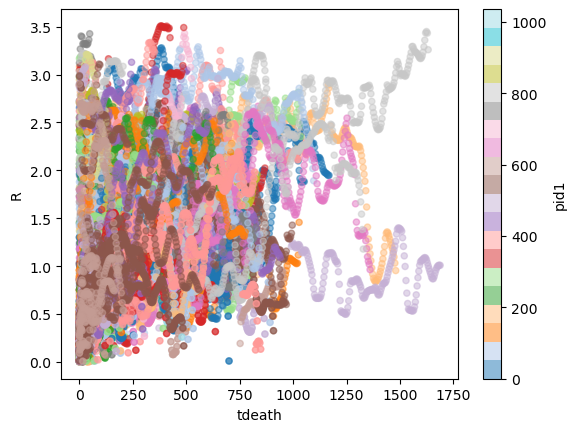

In [993]:
df_r.plot(kind='scatter',x='tdeath',y='R',c='pid1',cmap='tab20',alpha=0.5)
plt.show()

In [994]:
#TODO: subtract zero from each trajectory
#Q: was ^this done before or after averaging?

In [995]:
##########################
# GOAL: Compute MSR(t')
##########################
# R_col='R_nosavgol'
# T_col='tdeath_align'
R_col='R'
T_col='tdeath'
use_subtract_zero=True
use_subtract_zero=False
SR_values_lst=[]
tau_values_lst=[]
count_events=0
# for dict_msr in dict_msr_lst:
#     #recall the data values
#     df_R=dict_msr['df_R']
# for trial_num,df_R in df_r.groupby(by='trial_num'):
# for trial_num,df_R in df_r.groupby(by='trial_num'):
for trial_num,df_R in df_r.groupby(by=['trial_num','pid1']):
    SR_values=df_R[R_col].values**2
    tau_values=df_R[T_col].values
    if use_subtract_zero:
        SR_values-=SR_values[0]



    #count the number of events
#     num_events=df_R['index_pairs'].drop_duplicates().values.shape[0]
#     num_events=df_R['annihilation_index'].drop_duplicates().values.shape[0]

    #remove any null values
    boo_nan=np.isnan(tau_values)#tdeath_align has 6/1700 data points as null
    boo_nan|=np.isnan(SR_values)
    SR_values=SR_values[~boo_nan].copy()
    tau_values=tau_values[~boo_nan].copy()

    #record
    SR_values_lst.append(SR_values)
    tau_values_lst.append(tau_values)
#     count_events+=num_events
SR_values=np.concatenate(SR_values_lst)
tau_values=np.concatenate(tau_values_lst) 
    
num_trials=len(SR_values_lst)
num_obs=SR_values.shape[0]
# print(f"aggregated N''={num_obs} R(t') observations from N'={num_trials} termination events. this involved N={count_events} pair-annihilation events.")
# num_trials,len(tau_values_lst),num_obs,tau_values.shape[0] #they're the same

In [996]:
#DONE: investigate which parameter setting needs to be changed to make df_smoothed mapping to dfr have dfr with {num_particles/2=}, {num_pairs=}
#DONE: wrap up to here into 1-3 functions for a dask.bag routine
#DONE: wrap routine as func foo
#DONE: eval_routine
#DONE: plot the MSR, as before
#heretimheretim



# if printing:
#     print(f"removed {sum(boo_nan)} data points due to having null x-value (or y-value)") #~6 per 1700 removed bc of alignment of time
assert not np.isnan(SR_values).any() and not np.isnan(tau_values).any()
SR_values.shape,tau_values.shape
x_values_in = tau_values
y_values_in = SR_values
# np.max(tau_values),
tmax=np.max(x_values_in)

#compute bootstrap 
x_values_in=tau_values
y_values_in=SR_values
# bins='auto'
# bins=np.arange(0,200,1)
bins=np.arange(0,tmax,1)
df_bootstrap=bin_and_bootstrap_xy_values_parallel(x_values_in,
                               y_values_in,#dict_msr_lst,
                               xlabel='tdeath_avg',
                               ylabel='MSR',
                               bins=bins,
                               min_numobs=None,
                               num_bootstrap_samples=1000,
                               npartitions=10,
                               use_test=False)
df_bootstrap.head()

,tdeath_avg,MSR,Delta_tdeath_avg,Delta_MSR,p_tdeath_avg,p_MSR,counts
0,0.0,0.210512,0.0,0.033960,0.0,0.309945,2847
1,4.0,0.297013,0.0,0.034262,0.0,0.041011,2847
2,8.0,0.343617,0.0,0.034041,0.0,0.688048,2732
3,12.0,0.378219,0.0,0.034273,0.0,0.088565,2633
4,16.0,0.409553,0.0,0.034744,0.0,0.019262,2543


In [997]:
x_values=df_bootstrap['tdeath_avg'].values
y_values=df_bootstrap['MSR'].values
yerr_values=df_bootstrap['Delta_MSR'].values
x_values.shape,y_values.shape,yerr_values.shape

((371,), (371,), (371,))

Does this appear to intersect at zero?


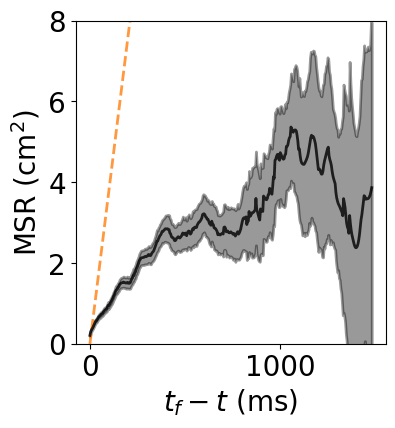

In [998]:
print(f"Does this appear to intersect at zero?")
c='k'
# plt.plot(x_values,y_values,lw=2,alpha=0.8,c=c)
# plt.fill_between(x_values,y_values-yerr_values,y_values+yerr_values,lw=2,alpha=0.4,color=c)
# format_plot(ax=plt.gca(),xlabel=r'$t_f-t$ (ms)',ylabel=r'MSR (cm$^2$)')
# # plt.xlim([0,180])
# # plt.ylim([0,3.1])
# plt.xlim([0,15])
# plt.ylim([-.1,1])
# plt.show()

# #plot expected
# plt.plot(x_values,4*9.5*1e-3*x_values,'--',lw=2,alpha=0.8,c='C1')
# # plt.plot(x_values,4*1.8*1e-3*x_values,'--',lw=2,alpha=0.8,c='C0')
# #plot data
# plt.plot(x_values,y_values,lw=2,alpha=0.8,c=c)
# plt.fill_between(x_values,y_values-yerr_values,y_values+yerr_values,lw=2,alpha=0.4,color=c)
# format_plot(ax=plt.gca(),xlabel=r'$t_f-t$ (ms)',ylabel=r'MSR (cm$^2$)')
# plt.xlim([0,180])
# plt.ylim([0,4.1])
# plt.show()

#plot expected
fig,ax=plt.subplots(figsize=(4,4.2))
ax.plot(x_values,4*9.5*1e-3*x_values,'--',lw=2,alpha=0.8,c='C1')
# ax.plot(x_values,4*1.8*1e-3*x_values,'--',lw=2,alpha=0.8,c='C0')
#plot data
ax.plot(x_values,y_values,lw=2,alpha=0.8,c=c)
ax.fill_between(x_values,y_values-yerr_values,y_values+yerr_values,lw=2,alpha=0.4,color=c)
format_plot(ax=ax,xlabel=r'$t_f-t$ (ms)',ylabel=r'MSR (cm$^2$)')
# ax.set_xlim([0,250])
ax.set_ylim([0,8])
plt.show()

In [999]:
#TODO: measure $a$
#Q: does Ko=5.4 reproduce what we already have?
#TODO: repeat for other Ko parameter setting
#Q: is there an effect?

In [1000]:
# select msr from the full models for fitting
min_tdeath=100. #ms  #LR
# min_tdeath=102. #ms  #LR
# min_tdeath=300. #ms  #FK 
min_tdeath=600. #ms  #FK 
# max_tdeath=1500. #ms  #FK 
max_tdeath=1500. #ms  #FK 
# max_tdeath=250. #ms  #FK 
printing=True

boo=x_values>=min_tdeath
boo&=x_values<max_tdeath
t_values=x_values[boo].copy()*1e-3
msr_values=y_values[boo].copy() 
# msr_values-= np.min(msr_values)
msr_values-=msr_values[0]
#measure D
dict_output = compute_95CI_ols(x=t_values,y=msr_values)
D = dict_output['m']/8
Delta_D = dict_output['Delta_m']/8

In [1001]:
np.min(t_values)
t_values

array([0.6  , 0.604, 0.608, 0.612, 0.616, 0.62 , 0.624, 0.628, 0.632,
       0.636, 0.64 , 0.644, 0.648, 0.652, 0.656, 0.66 , 0.664, 0.668,
       0.672, 0.676, 0.68 , 0.684, 0.688, 0.692, 0.696, 0.7  , 0.704,
       0.708, 0.712, 0.716, 0.72 , 0.724, 0.728, 0.732, 0.736, 0.74 ,
       0.744, 0.748, 0.752, 0.756, 0.76 , 0.764, 0.768, 0.772, 0.776,
       0.78 , 0.784, 0.788, 0.792, 0.796, 0.8  , 0.804, 0.808, 0.812,
       0.816, 0.82 , 0.824, 0.828, 0.832, 0.836, 0.84 , 0.844, 0.848,
       0.852, 0.856, 0.86 , 0.864, 0.868, 0.872, 0.876, 0.88 , 0.884,
       0.888, 0.892, 0.896, 0.9  , 0.904, 0.908, 0.912, 0.916, 0.92 ,
       0.924, 0.928, 0.932, 0.936, 0.94 , 0.944, 0.948, 0.952, 0.956,
       0.96 , 0.964, 0.968, 0.972, 0.976, 0.98 , 0.984, 0.988, 0.992,
       0.996, 1.   , 1.004, 1.008, 1.012, 1.016, 1.02 , 1.024, 1.028,
       1.032, 1.036, 1.04 , 1.044, 1.048, 1.052, 1.056, 1.06 , 1.064,
       1.068, 1.072, 1.076, 1.08 , 1.084, 1.088, 1.092, 1.096, 1.1  ,
       1.104, 1.108,

In [1002]:
# msr_values

In [1003]:
if printing:
    print(f"- D = m/8 = {D:.4f} +/- {Delta_D:.4f} (annihilation fit to t'>{min_tdeath:.4f} ms, t'<{max_tdeath:.4f})")
#     print(f"- D = m/8 = {Dc:.4f} +/- {Delta_Dc:.4f} (creation fit to t'<{min_tdeath:.4f} ms)")
#     print(f"- D = m/8 = {D:.4f} +/- {Delta_D:.4f} (annihilation fit to t'<{min_tdeath:.4f} ms)")
#     print_dict(dict_output)
# - D = m/8 = 0.3919 +/- 0.2262 (annihilation fit to t'<100.0000 ms) #by trial
# - D = m/8 = 0.1525 +/- 0.2036 (annihilation fit to t'<100.0000 ms)  #by trial,pid1
# - D = m/8 = -0.0205 +/- 0.2155 (annihilation fit to t'<100.0000 ms) #by trial,pid1, no ysubtract 
# - D = m/8 = -0.0205 +/- 0.2155 (annihilation fit to t'<100.0000 ms) #by trial, no ysubtract
# - D = m/8 = 1.2639 +/- 0.1688 (annihilation fit to t'>100.0000 ms, t'<250.0000) #by trial, no ysubtract
# - D = m/8 = 1.2639 +/- 0.1688 (annihilation fit to t'>100.0000 ms, t'<250.0000)

- D = m/8 = 0.1266 +/- 0.0524 (annihilation fit to t'>600.0000 ms, t'<1500.0000)


In [1004]:
minlifetime_values_lr = df_r.groupby(by=['trial_num','pid1'])['tdeath'].max().values
num_termination_events_lr = df_r['trial_num'].drop_duplicates().shape[0]
# minlifetime_values_lr = df_ranges_lr.groupby(by=['trial_num','annihilation_index'])['tdeath'].max().values
meanx,Delta_meanx,num_obsx,p_normalx=comp_mean_bootstrap_uncertainty(minlifetime_values_lr)
printing=True
if printing:
    print(f" - mean lifetime: {meanx:.4f} +/- {Delta_meanx:.4f} ms (N={num_obsx}, p_normal: {p_normalx:.4f}) from {num_termination_events_lr} termination events")

minlifetime_values =minlifetime_values_lr

 - mean lifetime: 105.5694 +/- 6.0624 ms (N=2847, p_normal: 0.1544) from 12 termination events


In [1005]:
# meanx=33.4

In [1006]:
meanx

105.5693712680014

In [1007]:
#### 
print(f"\ncomputing simulated annealing fits of oscillatory particle model to the Luo-Rudy model...")
# select msr from the full models for fitting
# x_values=x_values_lr.copy()
# y_values=y_values_lr.copy()
# minlifetime_values=minlifetime_values_lr.copy()
# max_tdeath=100. #ms #for lr
max_tdeath=100. #ms #for lr
max_tdeath=300. #ms #for fk
# meanx,Delta_meanx,num_obsx,p_normalx=comp_mean_bootstrap_uncertainty(minlifetime_values)
Gamma=float(meanx)
# testing=False 
# testing=True # True adds ~60 - 6.27 seconds to runtime
# if printing:
#     print(f"mean lifetime: {meanx:.4f} +/- {Delta_meanx:.4f} ms (N={num_obsx}, p_normal: {p_normalx:.4f}) from {minlifetime_values.shape[0]} observations")
#fit using simulated annealing
a0,a1,period,phase,rmse = fit_msr_oscillatory(x_values,y_values,max_tdeath,
                                    D=0.,maxiter=int(10000/4),seed=42,printing=printing)
alinear = comp_alinear(a0,a1,period,Gamma,phase)
omega = 2*np.pi/period
z = Gamma*omega
print(f"\tattraction coefficient: {a0=:.4f}, {a1=:.4f}, {z=:.4f}, {phase=:.4f} --> {alinear=:.4f} cm^2/s")
dict_fit=dict(a0=a0,a1=a1,period=period,phase=phase,rmse=rmse,
              alinear=alinear,omega=omega,z=z,Gamma=Gamma, Delta_Gamma=Delta_meanx, num_obs=num_obsx, p_normal=p_normalx)
if not testing:
    print_dict(dict_fit)

if testing:
    print(f"performing fit using simulated annealing with 10X the number of learning rounds...")
    a0,a1,period,phase,rmse = fit_msr_oscillatory(x_values,y_values,max_tdeath,
                                        D=0.,maxiter=10000,#maxiter=100000, 
                                                  seed=43,printing=printing)
    alinear = comp_alinear(a0,a1,period,Gamma,phase)
    omega = 2*np.pi/period
    z = Gamma*omega
    print(f"\tattraction coefficient: {a0=:.4f}, {a1=:.4f}, {z=:.4f}, {phase=:.4f} --> {alinear=:.4f} cm^2/s")
    dict_fit=dict(a0=a0,a1=a1,period=period,phase=phase,rmse=rmse,
                  alinear=alinear,omega=omega,z=z,Gamma=Gamma, Delta_Gamma=Delta_meanx, num_obs=num_obsx, p_normal=p_normalx)
    print_dict(dict_fit)    

dict_osc_fit_lr=dict(dict_fit)


computing simulated annealing fits of oscillatory particle model to the Luo-Rudy model...
performing simulated annealing with D=0 fixed (num. epochs: 2500)...
simulated annealing fit: a0=1.6085, a1=1.4962, period=108.5123, phase=-1.2422 --> rmse=0.0567 cm^2
	attraction coefficient: a0=1.6085, a1=1.4962, z=6.1128, phase=-1.2422 --> alinear=1.8467 cm^2/s
performing fit using simulated annealing with 10X the number of learning rounds...
performing simulated annealing with D=0 fixed (num. epochs: 10000)...
simulated annealing fit: a0=1.6087, a1=1.4951, period=108.5167, phase=-1.2405 --> rmse=0.0567 cm^2
	attraction coefficient: a0=1.6087, a1=1.4951, z=6.1125, phase=-1.2405 --> alinear=1.8466 cm^2/s
a0=1.608672307135393
a1=1.4950739968751492
period=108.51673596326538
phase=-1.240456552590493
rmse=0.056727658313104355
alinear=1.8466494653397527
omega=0.05790061091873002
z=6.112531090723506
Gamma=105.5693712680014
Delta_Gamma=6.062351429807678
num_obs=2847
p_normal=0.15438394648706688


In [848]:
(5.4-3.8)/5.4
# alinear=8.8211 cm^2/s,  alinear=10.5204 cm^2/s #K0=5.4 #mean lifetime: 81.7227 +/- 2.8652 ms #D = m/8 = 0.1262 +/- 0.2053
# alinear=5.3581 cm^2/s,  alinear=6.4220 cm^2/s #K0=3.8 #mean lifetime: 100.8040 +/- 2.8937 ms #D = m/8 = 0.3011 +/- 0.0429
#heretim
# alinear=9.2551, alinear=9.3359 cm^2/s #K0=5.4 #mean lifetime: 39.3010 +/- 1.2365 ms, D = m/8 = 0.7724 +/- 0.1682
# alinear=5.8230 cm^2/s, alinear=5.7337 cm^2/s #mean lifetime: 45.9363 +/- 1.1792 ms, D = m/8 = 0.4158 +/- 0.0348
(5.4-7.0)/5.4
#Ko=50 alinear=7.0668 cm^2/s, alinear=6.2588 cm^2/s
#Ko=7.0 alinear=9.4365 cm^2/s, alinear=9.0228 cm^2/s

-0.2962962962962962

In [1008]:
(1.552 - 1.8466)/1.552

-0.18981958762886594

In [849]:
# (10.5204-6.4220)/10.5204
# (9.5600-??)/9.5600 
# (9.3359-5.7337)/9.3359
(9.3359-9.0228)/9.3359

0.033537205839822656

- At first glance, reducing $[K^+]_o$ by 29.6% reduced $a$ by 39.0%. ( min_duration=40)
- Using same $a$ as in table 1, For the LR model, reducing $[K^+]_o$ by 29.6% reduced $a$ by 38.6%. ( min_duration=1)
- For the LR model, increasing $[K^+]_o$ by 825.9% reduced $a$ by 33.0%. ( min_duration=1)
- For the LR model, increasing $[K^+]_o$ by 29.6% reduced $a$ by 3.4%. ( min_duration=1)
- For the FK model, increasing $\tau_d$ by 20.0\% increased $a$ by 19.0\%.

In [841]:
(9.3359-6.2588)/9.3359,(50-5.4)/5.4

(0.32959864608661193, 8.25925925925926)

In [842]:
alinear+2*D

11.327764159900712

In [843]:
9.3+2*0.42

10.14

# print mean termination time of input folder

In [1024]:
input_fn_lst = os.listdir(input_folder)
#TODO(later): remove .DS_Store on mac explicitely
# task_lst=[]
T_term=0.
Tsq_term=0.
for trial_num,input_fn in enumerate(input_fn_lst):
    input_dir=os.path.join(input_folder,input_fn)
    t_term=pd.read_csv(input_dir).tail(1)['t'].values[0]
    T_term+=t_term
    Tsq_term+=t_term**2
mtt=T_term/trial_num*1e-3
Delta_mtt=1.96*(Tsq_term/trial_num*1e-6 - mtt**2)
print(f"{mtt=:.4f} +/- {Delta_mtt:.4f} s")

mtt=2.0244 +/- 4.0637 s


In [1018]:
#LR
# mtt=2.0244 +/- 4.0637 s
# mtt: 0.74±0.06

#FK
# mtt=13.9647 +/- 226.4798 s #taud=0.54
# mtt: 27.8±6.5 #taud=0.45 #from Table 2

In [1025]:
(27.8-13.9647)/27.8
(0.74-2.0244)/0.74

-1.7356756756756757

To our Letter:
- For the FK model, increasing the parameter, $\tau_d$, by 20.0\% resulted in $a$ increasing by 19.0\% and $\tau$ decreasing by 49.8\%.
- For the LR model, reducing $[K^+]_o$ by 29.6\% reduced $a$ by 38.6\% and increased $\tau$ by 173.6\%.